<a href="https://colab.research.google.com/github/DonRoboto/MOO_v1/blob/main/T1_P1_P2_GD_version1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import random
from sympy import *
import scipy, pylab

In [2]:
class Esfera():    
    def __init__(self):
        self.x1 = Symbol('x1')
        self.x2 = Symbol('x2')
        self.fx = self.x1**2 + self.x2**2

    def Eval(self, X):
        f = self.fx.subs([(self.x1, X[0][0]), (self.x2, X[1][0])]).doit()
        return f

    def Gradient(self):
        d1 = np.array( [[self.fx.diff(self.x1)], [self.fx.diff(self.x2) ]] )
        return d1

    def Gradient_k(self, K):
        d1 = np.array( [[self.fx.diff(self.x1)], [self.fx.diff(self.x2) ]] )
        v1 = d1[0][0].subs([(self.x1, K[0][0]), (self.x2, K[1][0])]).doit()
        v2 = d1[1][0].subs([(self.x1, K[0][0]), (self.x2, K[1][0])]).doit()      
        return np.array( [[v1], [v2 ]] )

    def pk(self, X):
      direct = -1 * self.Gradient()
      v1 = direct[0][0].subs([(self.x1, X[0][0]), (self.x2, X[1][0])]).doit()
      v2 = direct[1][0].subs([(self.x1, X[0][0]), (self.x2, X[1][0])]).doit()      
      return np.array( [[v1], [v2 ]] )



In [3]:
class Schwefel():    
    def __init__(self):
        self.x1 = Symbol('x1')
        self.x2 = Symbol('x2')
        d=2
        self.fx = (418.8929 * d) - ( (self.x1 * sin( sqrt(  sqrt(self.x1**2)  ) ) )  + (self.x2 * sin( sqrt(  sqrt(self.x2**2)   ) ))  )

    def Eval(self, X):
        f = self.fx.subs([(self.x1, X[0][0]), (self.x2, X[1][0])]).doit()
        return f

    def Gradient(self):
        d1 = np.array( [[self.fx.diff(self.x1)], [self.fx.diff(self.x2) ]] )
        return d1

    def Gradient_k(self, K):
        d1 = np.array( [[self.fx.diff(self.x1)], [self.fx.diff(self.x2) ]] )
        v1 = d1[0][0].subs([(self.x1, K[0][0]), (self.x2, K[1][0])]).doit()
        v2 = d1[1][0].subs([(self.x1, K[0][0]), (self.x2, K[1][0])]).doit()      
        return np.array( [[v1], [v2 ]] )

    def pk(self, X):
      direct = -1 * self.Gradient()
      v1 = direct[0][0].subs([(self.x1, X[0][0]), (self.x2, X[1][0])]).doit()
      v2 = direct[1][0].subs([(self.x1, X[0][0]), (self.x2, X[1][0])]).doit()      
      return np.array( [[v1], [v2 ]] )


In [4]:
#Condiciones de Wolfe
def StepSize(func, X, alpha, ro, c):
  counter=0
  pk = func.pk(X)
  g = func.Gradient_k(X)
  gT = np.transpose(g)

  while True:
    Xd = X + alpha * pk
    fd = func.Eval(Xd)
    fi = func.Eval(X) + c *alpha * np.matmul(gT, pk).item()
    counter += 1
        
    if fd<fi or counter>100:
      return alpha
    else:
      alpha = ro * alpha
  

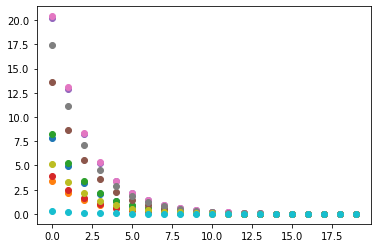

In [5]:
#algoritmo principal

rango_max = 5.12
rango_min = -5.12

#funcion a optimizar
myFunc = Esfera()

#almacenar las 10 ejecuciones durante 20 iteraciones del algoritmo
result = np.zeros((10, 20))

for i in range(10):

  # X inicial aleatorio
  r1 = random.uniform(rango_min, rango_max)
  r2 = random.uniform(rango_min, rango_max)
  xk = np.array([[r1], [r2]])

  #parametros iniciales
  alpha = 0.1
  ro = 0.1
  c = 0.0001

  for j in range(20):
    pk = myFunc.pk(xk)
    alpha = StepSize(myFunc, xk, alpha, ro, c)
    xk = xk + (alpha * pk)

    ev = myFunc.Eval(xk)
    
    result[i][j] = ev



#graficar resultados
ax = pylab.subplot(111)

for i in range(10):
  x=[]
  y=[]
  for j in range(20):
    x.append(j)
    y.append(result[i][j])
  ax.scatter(x, y)

ax.figure.show()

In [6]:
#solo resultados finales
rf = []
for k in range(10):
  rf.append(result[k][19])

print("mínimo: {}".format(np.min(rf)))
print("máximo: {}".format(np.max(rf)))
print("media: {}".format(np.mean(rf)))
print("mediana: {}".format(np.median(rf)))
print("desviación estándar: {}".format(np.std(rf)))


mínimo: 6.150585473520272e-05
máximo: 0.004237369108579062
media: 0.0020868955411038658
mediana: 0.0016617811293192794
desviación estándar: 0.0014479466500396583


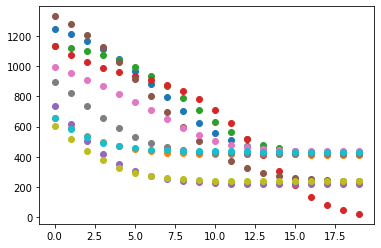

In [7]:
#algoritmo principal

rango_max = 500
rango_min = -500

#funcion a optimizar
myFunc = Schwefel()

#almacenar las 10 ejecuciones durante 20 iteraciones del algoritmo
result = np.zeros((10, 20))

for i in range(10):

  # X inicial aleatorio
  r1 = random.uniform(rango_min, rango_max)
  r2 = random.uniform(rango_min, rango_max)
  xk = np.array([[r1], [r2]])

  #parametros iniciales
  alpha = 0.9
  ro = 0.1
  c = 0.0001

  for j in range(20):
    pk = myFunc.pk(xk)
    alpha = StepSize(myFunc, xk, alpha, ro, c)
    xk = xk + (alpha * pk)

    ev = myFunc.Eval(xk)
    
    result[i][j] = ev



#graficar resultados
ax = pylab.subplot(111)

for i in range(10):
  x=[]
  y=[]
  for j in range(20):
    x.append(j)
    y.append(result[i][j])
  ax.scatter(x, y)

ax.figure.show()

In [8]:
#solo resultados finales
rf = []
for k in range(10):
  rf.append(result[k][19])

print("mínimo: {}".format(np.min(rf)))
print("máximo: {}".format(np.max(rf)))
print("media: {}".format(np.mean(rf)))
print("mediana: {}".format(np.median(rf)))
print("desviación estándar: {}".format(np.std(rf)))


mínimo: 19.924247546476636
máximo: 434.87887353832934
media: 324.60383916452764
mediana: 414.68187887437773
desviación estándar: 132.9882301526607
